In [1]:
import json, requests
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x = requests.get('http://0.0.0.0:5000/weights/optimize').text
data = json.loads(x)

In [3]:
data

[{'allocations': [{'ticker': 'VTI', 'weight': 0.22881987055600253},
   {'ticker': 'VEA', 'weight': 0.3067710824245142},
   {'ticker': 'VWO', 'weight': 7.085261197192771e-17},
   {'ticker': 'VNQ', 'weight': 0.3644090470194833},
   {'ticker': 'XLE', 'weight': 0.0},
   {'ticker': 'BND', 'weight': 1.2289431625123193e-16},
   {'ticker': 'SCHP', 'weight': 1.6067876196235176e-16},
   {'ticker': 'VTEB', 'weight': 0.09999999999999974},
   {'ticker': 'VIG', 'weight': 0.0}]},
 {'info': [{'volatility': 0.10100280504013291},
   {'return': 0.02666666666653035},
   {'sharpe': 0.26401907012319603}]}]

In [10]:
stock_close = pd.read_pickle('stock_close.pickle')

In [11]:
stock_close.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
date,,,,,,,,,
1496725200000,124.93,41.94,41.20,82.71,65.98,82.10,55.72,51.63,93.39
1496811600000,125.07,41.91,41.17,83.29,65.05,81.99,55.53,51.59,93.52
1496898000000,125.29,41.85,41.25,83.09,64.86,81.93,55.52,51.53,93.57
1496984400000,125.19,41.70,40.97,83.67,66.42,81.86,55.43,51.47,93.75
1497243600000,125.17,41.57,40.82,84.42,66.89,81.84,55.36,51.43,93.82


In [12]:
allos = data[0]['allocations']
allos

[{'ticker': 'VTI', 'weight': 0.22881987055600253},
 {'ticker': 'VEA', 'weight': 0.3067710824245142},
 {'ticker': 'VWO', 'weight': 7.085261197192771e-17},
 {'ticker': 'VNQ', 'weight': 0.3644090470194833},
 {'ticker': 'XLE', 'weight': 0.0},
 {'ticker': 'BND', 'weight': 1.2289431625123193e-16},
 {'ticker': 'SCHP', 'weight': 1.6067876196235176e-16},
 {'ticker': 'VTEB', 'weight': 0.09999999999999974},
 {'ticker': 'VIG', 'weight': 0.0}]

In [13]:
for i in allos:
    ticker = i['ticker']
    w = i['weight']
    stock_close[ticker] *= w
#     for k,v in i.items():
#         stock_close[k] *= v

In [14]:
stock_close.head()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG
date,,,,,,,,,
1496725200000,28.586466,12.865979,2.919128e-15,30.140272,0.0,1.008962e-14,8.953021e-15,5.163,0.0
1496811600000,28.618501,12.856776,2.917002e-15,30.351630,0.0,1.007610e-14,8.922492e-15,5.159,0.0
1496898000000,28.668842,12.838370,2.922670e-15,30.278748,0.0,1.006873e-14,8.920885e-15,5.153,0.0
1496984400000,28.645960,12.792354,2.902832e-15,30.490105,0.0,1.006013e-14,8.906424e-15,5.147,0.0
1497243600000,28.641383,12.752474,2.892204e-15,30.763412,0.0,1.005767e-14,8.895176e-15,5.143,0.0


In [15]:
stock_close['total'] = stock_close.sum(axis=1)
stock_close['daily_return'] = stock_close['total'].pct_change(1)

In [16]:
stock_close.tail()

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG,total,daily_return
date,,,,,,,,,,,
1559278800000,32.192668,12.221760,2.879450e-15,31.663502,0.0,1.010683e-14,9.001224e-15,5.298,0.0,81.375930,-0.004188
1559538000000,32.128598,12.270843,2.896455e-15,31.740028,0.0,1.011174e-14,9.002831e-15,5.294,0.0,81.433469,0.000707
1559624400000,32.849381,12.430364,2.897163e-15,31.597908,0.0,1.009454e-14,8.988370e-15,5.291,0.0,82.168653,0.009028
1559710800000,33.101082,12.424229,2.875908e-15,32.257489,0.0,1.009454e-14,8.991584e-15,5.288,0.0,83.070800,0.010979
1559797200000,33.286427,12.476380,2.875199e-15,32.319438,0.0,1.009208e-14,8.985156e-15,5.288,0.0,83.370245,0.003605


In [17]:
stock_close['returns'] = stock_close['daily_return'].cumsum(axis=0)

In [18]:
stock_close.fillna(0)

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG,total,daily_return,returns
date,,,,,,,,,,,,
1496725200000,28.586466,12.865979,2.919128e-15,30.140272,0.0,1.008962e-14,8.953021e-15,5.163,0.0,76.755718,0.000000,0.000000
1496811600000,28.618501,12.856776,2.917002e-15,30.351630,0.0,1.007610e-14,8.922492e-15,5.159,0.0,76.985907,0.002999,0.002999
1496898000000,28.668842,12.838370,2.922670e-15,30.278748,0.0,1.006873e-14,8.920885e-15,5.153,0.0,76.938959,-0.000610,0.002389
1496984400000,28.645960,12.792354,2.902832e-15,30.490105,0.0,1.006013e-14,8.906424e-15,5.147,0.0,77.075419,0.001774,0.004163
1497243600000,28.641383,12.752474,2.892204e-15,30.763412,0.0,1.005767e-14,8.895176e-15,5.143,0.0,77.300269,0.002917,0.007080
1497330000000,28.783252,12.862911,2.905666e-15,30.832649,0.0,1.006013e-14,8.904817e-15,5.143,0.0,77.621812,0.004160,0.011240
1497416400000,28.742064,12.847573,2.903540e-15,30.876379,0.0,1.009700e-14,8.908031e-15,5.150,0.0,77.616015,-0.000075,0.011165
1497502800000,28.677994,12.709526,2.878033e-15,31.033074,0.0,1.008594e-14,8.869468e-15,5.147,0.0,77.567595,-0.000624,0.010541
1497589200000,28.659689,12.823031,2.887244e-15,30.952904,0.0,1.009700e-14,8.874288e-15,5.152,0.0,77.587624,0.000258,0.010799


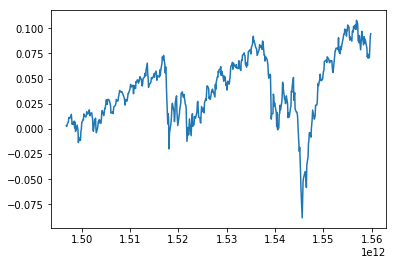

In [19]:
plt.plot(stock_close['returns'])

In [20]:
stock_close

,VTI,VEA,VWO,VNQ,XLE,BND,SCHP,VTEB,VIG,total,daily_return,returns
date,,,,,,,,,,,,
1496725200000,28.586466,12.865979,2.919128e-15,30.140272,0.0,1.008962e-14,8.953021e-15,5.163,0.0,76.755718,NaN,NaN
1496811600000,28.618501,12.856776,2.917002e-15,30.351630,0.0,1.007610e-14,8.922492e-15,5.159,0.0,76.985907,0.002999,0.002999
1496898000000,28.668842,12.838370,2.922670e-15,30.278748,0.0,1.006873e-14,8.920885e-15,5.153,0.0,76.938959,-0.000610,0.002389
1496984400000,28.645960,12.792354,2.902832e-15,30.490105,0.0,1.006013e-14,8.906424e-15,5.147,0.0,77.075419,0.001774,0.004163
1497243600000,28.641383,12.752474,2.892204e-15,30.763412,0.0,1.005767e-14,8.895176e-15,5.143,0.0,77.300269,0.002917,0.007080
1497330000000,28.783252,12.862911,2.905666e-15,30.832649,0.0,1.006013e-14,8.904817e-15,5.143,0.0,77.621812,0.004160,0.011240
1497416400000,28.742064,12.847573,2.903540e-15,30.876379,0.0,1.009700e-14,8.908031e-15,5.150,0.0,77.616015,-0.000075,0.011165
1497502800000,28.677994,12.709526,2.878033e-15,31.033074,0.0,1.008594e-14,8.869468e-15,5.147,0.0,77.567595,-0.000624,0.010541
1497589200000,28.659689,12.823031,2.887244e-15,30.952904,0.0,1.009700e-14,8.874288e-15,5.152,0.0,77.587624,0.000258,0.010799
